# Bootstrap Simulation with Portfolio Optimizer: Usage for Financial Planning

> This notebook illustrates the usage of bootstrapping in Python, using the [Portfolio Optimizer](https://portfoliooptimizer.io/) Web API.

> Idea is to simulate how a portfolio of U.S. stocks is likely to behave over the next 30 years using data from [Robert Shiller's website](http://www.econ.yale.edu/~shiller/).

> Let's import the nominal total returns for U.S. stocks found in Shiller's Excel file, over the period January 1871 - December 1989. 

In [1]:
import pandas as pd

# Import total return prices 
shiller_tr_prices_in = pd.DataFrame([4.44, 4.52, 4.65, 4.81, 4.95, 4.93, 4.86, 4.95, 5.02, 4.78, 4.86, 4.99, 5.13, 5.18, 5.37, 5.55, 5.57, 5.54, 5.54, 5.50, 5.42, 5.47, 5.48, 5.64, 5.71, 5.78, 5.77, 5.72, 5.76, 5.71, 5.73, 5.76, 5.35, 4.92, 4.77, 5.25, 5.57, 5.77, 5.72, 5.60, 5.48, 5.49, 5.53, 5.57, 5.69, 5.72, 5.80, 5.80, 5.83, 5.86, 5.97, 6.08, 5.88, 5.80, 5.84, 5.90, 5.88, 5.82, 5.95, 5.99, 6.15, 6.26, 6.28, 6.08, 5.89, 5.89, 5.85, 5.64, 5.33, 5.34, 5.28, 5.28, 5.27, 5.00, 4.78, 4.46, 4.50, 4.21, 4.42, 4.76, 5.09, 5.22, 5.17, 5.18, 5.20, 5.12, 5.24, 5.41, 5.45, 5.59, 5.73, 5.71, 5.85, 5.81, 5.81, 5.81, 6.05, 6.30, 6.22, 6.45, 6.77, 6.83, 7.00, 7.08, 7.36, 8.20, 8.66, 8.67, 9.04, 9.23, 9.44, 9.26, 8.56, 8.63, 9.06, 9.42, 9.44, 9.75, 10.30, 10.77, 11.45, 11.46, 11.63, 11.64, 12.20, 12.40, 12.01, 11.78, 11.92, 11.78, 11.90, 11.61, 11.49, 11.29, 11.32, 11.37, 11.29, 11.28, 11.97, 12.38, 12.55, 12.27, 11.79, 11.91, 11.90, 11.69, 11.89, 12.19, 12.04, 12.20, 12.07, 11.58, 11.77, 11.50, 11.73, 11.54, 11.25, 11.61, 11.63, 11.16, 10.32, 9.95, 10.01, 10.70, 10.42, 10.14, 9.99, 10.03, 9.86, 10.22, 10.30, 10.33, 10.27, 10.27, 10.71, 11.36, 11.27, 11.98, 12.80, 12.76, 12.80, 13.10, 12.88, 12.75, 12.55, 13.17, 13.42, 13.57, 13.97, 14.37, 14.77, 14.44, 14.33, 14.28, 14.66, 15.05, 15.36, 14.97, 14.65, 14.34, 14.21, 13.78, 14.10, 14.08, 14.24, 14.22, 13.73, 13.84, 14.09, 13.71, 14.12, 14.47, 14.88, 14.85, 14.60, 14.38, 14.71, 14.93, 14.68, 14.70, 15.15, 15.46, 15.20, 15.46, 15.88, 15.65, 15.56, 15.52, 15.75, 15.63, 15.56, 15.94, 16.68, 16.61, 16.55, 16.22, 16.00, 15.33, 14.27, 13.99, 14.78, 15.02, 14.80, 15.35, 15.34, 15.09, 14.90, 15.46, 16.77, 16.82, 16.63, 17.19, 17.57, 17.66, 17.91, 17.94, 18.00, 17.97, 18.03, 18.36, 17.96, 18.39, 18.39, 18.26, 18.65, 18.39, 17.79, 17.86, 16.34, 15.64, 14.25, 13.98, 15.04, 15.56, 15.87, 15.39, 15.15, 15.43, 15.96, 16.24, 15.70, 15.56, 15.30, 15.95, 16.27, 15.82, 15.89, 15.81, 15.69, 15.53, 15.59, 16.32, 17.28, 17.68, 17.82, 18.15, 18.32, 18.12, 17.57, 16.59, 16.46, 17.22, 17.01, 17.22, 17.21, 16.95, 15.91, 15.07, 15.92, 16.34, 17.51, 16.93, 16.99, 16.89, 16.99, 16.53, 16.67, 17.51, 18.35, 19.60, 20.61, 20.01, 19.37, 19.85, 20.45, 20.48, 19.62, 19.34, 20.68, 21.56, 21.71, 22.59, 22.62, 22.21, 23.02, 24.52, 26.46, 27.53, 28.00, 28.42, 27.31, 26.77, 27.77, 28.56, 28.32, 28.27, 28.88, 26.99, 27.43, 28.01, 28.32, 28.77, 27.51, 26.78, 26.88, 27.35, 26.82, 27.90, 30.19, 32.12, 33.18, 34.14, 35.49, 38.58, 36.76, 40.55, 37.95, 38.60, 38.54, 38.23, 39.18, 38.68, 39.64, 40.11, 40.29, 41.80, 41.83, 41.72, 42.80, 44.08, 44.31, 43.05, 41.53, 40.71, 42.92, 42.81, 41.27, 39.73, 39.10, 37.09, 35.53, 34.54, 33.85, 32.91, 33.16, 34.85, 35.59, 34.78, 34.82, 35.84, 35.23, 35.43, 37.05, 38.46, 40.30, 42.81, 45.28, 45.87, 47.01, 49.22, 50.76, 50.30, 47.97, 48.68, 50.36, 52.39, 52.72, 53.61, 53.48, 54.96, 57.03, 56.79, 55.56, 54.98, 53.70, 54.58, 53.35, 57.48, 59.44, 57.85, 59.24, 58.90, 57.43, 55.83, 50.55, 51.00, 49.45, 48.07, 50.13, 46.59, 46.32, 41.51, 39.30, 41.54, 43.54, 42.18, 44.13, 46.74, 49.48, 49.78, 51.83, 54.28, 53.91, 54.79, 58.73, 60.28, 60.70, 59.19, 60.22, 63.16, 65.49, 66.89, 68.08, 69.97, 70.29, 70.81, 70.72, 71.81, 70.53, 68.27, 70.22, 68.79, 67.92, 64.93, 61.92, 63.69, 64.40, 67.65, 67.86, 66.25, 68.15, 69.61, 69.09, 69.08, 70.86, 72.57, 72.57, 69.40, 65.91, 66.59, 69.56, 70.17, 70.54, 70.23, 72.56, 75.13, 75.36, 75.67, 76.06, 78.12, 78.84, 78.99, 78.43, 75.93, 75.61, 73.25, 72.19, 72.44, 70.79, 67.56, 68.81, 70.98, 71.99, 70.05, 68.61, 68.86, 72.03, 73.31, 72.26, 70.86, 71.63, 71.60, 67.97, 68.29, 68.61, 68.93, 69.25, 66.59, 68.09, 67.50, 69.56, 75.12, 73.69, 74.85, 74.90, 78.42, 81.66, 86.53, 89.89, 90.42, 89.34, 88.46, 88.54, 87.96, 90.29, 91.57, 90.71, 91.82, 96.00, 99.42, 102.17, 98.53, 96.70, 91.73, 95.08, 94.16, 91.51, 93.90, 91.86, 89.70, 85.97, 81.90, 75.68, 73.72, 78.77, 81.79, 80.74, 80.57, 83.73, 84.44, 85.70, 87.08, 87.20, 91.46, 94.35, 93.04, 93.00, 93.92, 97.33, 101.13, 108.67, 112.13, 116.34, 109.07, 111.34, 117.58, 114.65, 111.84, 111.26, 102.61, 110.39, 110.05, 103.70, 102.46, 102.89, 99.41, 103.51, 104.20, 99.48, 91.13, 95.71, 95.60, 93.72, 94.69, 98.13, 90.83, 91.11, 90.55, 93.34, 95.17, 100.83, 104.95, 105.36, 108.23, 112.86, 120.30, 125.57, 124.99, 126.48, 131.85, 135.90, 139.53, 133.23, 133.57, 136.05, 142.51, 145.47, 141.05, 135.05, 130.59, 126.88, 128.20, 129.68, 128.47, 133.02, 138.23, 143.47, 144.84, 142.80, 140.25, 140.49, 143.89, 151.32, 157.27, 156.52, 155.26, 164.71, 174.38, 182.38, 184.73, 180.69, 179.60, 186.20, 190.37, 196.51, 200.03, 205.52, 213.19, 220.71, 225.21, 229.56, 230.86, 216.13, 211.05, 213.50, 224.65, 235.12, 245.46, 250.24, 245.66, 249.94, 256.72, 256.11, 262.20, 267.37, 275.07, 285.72, 290.60, 298.24, 315.32, 334.45, 330.57, 339.36, 348.59, 351.28, 348.38, 368.41, 392.97, 406.47, 387.93, 392.17, 406.27, 436.24, 446.54, 478.17, 481.51, 518.56, 522.79, 533.53, 531.94, 541.51, 553.45, 604.39, 640.41, 667.61, 598.70, 441.91, 461.25, 469.68, 500.85, 521.50, 556.38, 524.94, 473.65, 465.32, 461.15, 462.74, 400.86, 373.61, 350.49, 362.93, 392.45, 401.76, 365.26, 331.78, 322.86, 335.29, 326.93, 279.93, 244.21, 249.20, 204.07, 202.28, 202.14, 204.39, 156.86, 139.06, 121.77, 129.25, 195.56, 215.78, 187.20, 186.51, 181.53, 189.82, 168.42, 168.97, 187.96, 243.05, 285.77, 309.94, 295.54, 294.10, 266.51, 273.97, 280.32, 297.37, 320.42, 305.05, 311.21, 280.63, 285.41, 272.98, 263.39, 258.10, 261.22, 269.61, 272.47, 273.57, 266.41, 250.61, 270.49, 292.84, 305.05, 322.14, 345.02, 353.42, 364.00, 399.37, 400.57, 423.91, 449.51, 460.37, 462.33, 439.16, 459.29, 487.98, 499.24, 506.50, 534.71, 551.40, 543.77, 562.60, 581.21, 582.57, 549.89, 527.50, 509.97, 542.51, 550.24, 474.45, 407.59, 373.93, 370.15, 382.11, 375.20, 352.60, 340.42, 345.68, 355.78, 428.59, 433.05, 415.28, 463.38, 465.39, 453.37, 448.11, 446.07, 447.27, 392.53, 408.62, 417.50, 429.37, 424.82, 471.82, 478.41, 471.73, 462.49, 461.81, 460.77, 460.11, 466.66, 404.42, 371.71, 386.11, 396.37, 415.25, 421.33, 433.34, 417.79, 420.81, 396.73, 401.41, 391.20, 385.00, 400.82, 423.73, 424.06, 427.73, 413.05, 396.20, 372.91, 382.64, 373.13, 355.33, 343.03, 349.41, 369.46, 385.59, 385.72, 392.08, 423.29, 432.37, 436.90, 465.31, 495.25, 515.13, 534.64, 557.96, 570.13, 584.24, 557.73, 571.98, 569.13, 545.21, 554.87, 575.23, 573.84, 592.44, 584.71, 597.60, 628.34, 647.33, 640.51, 632.68, 650.92, 649.07, 665.95, 688.50, 714.22, 716.48, 737.27, 767.94, 784.74, 771.45, 776.92, 832.71, 870.30, 901.68, 919.94, 959.51, 965.16, 939.35, 1002.94, 1008.13, 1004.72, 979.14, 963.25, 824.34, 808.94, 808.87, 836.35, 844.06, 880.12, 847.81, 819.91, 808.80, 840.57, 896.89, 882.95, 863.87, 890.09, 883.68, 873.84, 866.30, 827.77, 843.67, 912.75, 961.40, 1005.50, 985.86, 961.36, 954.88, 985.42, 935.26, 933.88, 949.18, 917.69, 931.46, 935.38, 933.74, 887.94, 943.59, 982.98, 1001.40, 1033.05, 1053.34, 1087.67, 1116.33, 1144.55, 1160.34, 1199.69, 1246.71, 1273.75, 1188.36, 1267.48, 1319.80, 1382.39, 1387.86, 1390.83, 1502.37, 1567.20, 1549.87, 1579.80, 1589.81, 1571.69, 1608.80, 1688.60, 1741.47, 1741.74, 1702.26, 1763.54, 1831.17, 1806.80, 1820.37, 1824.13, 1832.58, 1892.11, 1955.81, 1973.03, 1951.16, 1919.64, 1989.96, 2079.60, 2100.16, 2083.92, 2103.86, 2009.78, 2029.96, 1966.89, 2004.53, 2022.55, 1939.49, 2007.76, 2062.21, 2100.16, 2163.71, 2221.66, 2279.08, 2380.47, 2485.70, 2516.05, 2628.25, 2691.22, 2765.01, 2840.13, 2962.49, 3109.40, 3176.88, 3294.62, 3280.29, 3405.24, 3402.58, 3611.70, 3887.91, 3876.40, 4063.23, 3871.30, 4144.90, 4196.23, 4096.27, 4135.39, 4433.62, 4499.54, 4372.01, 4360.73, 4611.53, 4598.51, 4456.57, 4413.81, 4382.10, 4461.10, 4377.98, 4203.02, 4271.11, 4384.03, 4566.42, 4655.66, 4763.85, 4515.96, 4347.17, 4090.92, 4017.35, 4030.21, 4124.00, 4152.89, 4253.29, 4291.31, 4443.88, 4565.31, 4705.50, 4896.28, 5040.41, 5260.18, 5435.20, 5552.79, 5789.11, 5715.93, 5876.39, 5990.24, 6096.05, 6059.15, 6315.36, 6295.31, 6062.24, 6073.01, 6113.70, 6325.49, 6231.83, 6007.24, 5942.80, 6036.98, 5999.31, 6238.60, 6101.59, 6192.55, 6024.07, 5923.23, 6132.96, 6297.98, 6639.74, 6930.13, 7165.52, 7374.68, 7467.85, 7387.19, 7385.18, 7668.76, 7627.28, 7729.91, 8098.97, 8193.36, 7907.71, 8058.77, 8086.31, 7848.24, 7284.40, 6453.11, 6628.53, 6828.98, 6788.53, 6594.79, 7069.83, 7396.89, 7703.68, 7826.66, 7818.25, 8207.62, 8394.07, 8412.42, 8309.66, 8561.57, 8809.34, 8853.61, 8826.71, 9038.20, 9339.36, 9477.74, 9674.20, 9838.16, 9958.40, 9923.65, 10316.93, 10190.69, 10391.19, 10596.12, 10695.61, 10536.42, 10833.80, 10939.61, 10976.50, 11147.68, 11341.04, 10830.07, 10841.39, 11071.25, 11469.56, 11756.15, 11882.86, 11857.93, 12092.99, 12041.15, 11576.30, 11960.92, 11362.15, 11298.76, 11301.06, 10649.27, 10306.07, 10247.82, 10792.53, 10869.71, 11318.77, 11741.07, 12050.42, 12290.52, 12543.42, 12419.01, 12666.52, 12901.14, 13114.59, 13127.36, 12749.07, 13145.78, 13143.60, 12584.19, 12388.09, 13337.39, 13678.67, 14081.08, 14088.12, 13815.82, 14300.60, 14689.32, 14951.80, 15144.13, 14540.74, 14506.17, 14228.67, 14552.38, 15063.80, 14315.05, 13713.14, 13674.32, 13760.35, 13945.66, 14084.81, 13376.74, 13297.98, 12873.01, 13132.09, 12771.30, 11341.08, 11310.51, 11369.66, 11739.87, 12482.03, 12792.56, 12818.80, 13736.20, 14300.72, 14894.23, 15315.88, 15878.52, 15702.57, 15451.93, 15380.35, 15146.97, 15523.54, 15234.15, 14568.10, 15611.61, 16302.04, 16642.26, 17078.22, 17293.22, 17159.04, 17247.60, 17160.74, 17810.09, 17594.55, 17668.31, 18596.95, 19027.14, 19215.47, 18576.63, 18326.80, 18027.69, 17564.65, 17215.38, 17423.95, 17139.23, 17481.43, 18222.33, 16974.09, 15819.46, 16088.74, 15691.17, 16409.26, 15619.17, 15196.84, 15266.61, 13534.76, 13025.63, 11721.73, 12000.39, 12449.67, 11691.30, 12700.93, 14073.92, 14774.25, 14994.15, 16000.84, 16464.21, 16535.33, 15378.48, 15247.35, 16005.18, 16331.81, 16139.00, 17679.57, 18418.29, 18566.14, 18769.88, 18698.29, 18867.05, 19370.38, 19262.25, 19732.31, 19120.03, 19050.97, 19773.38, 19667.88, 19202.76, 19193.10, 18964.90, 18978.04, 19149.70, 19396.03, 18993.62, 18771.13, 18359.49, 18540.55, 18526.62, 17899.21, 17725.95, 17773.76, 18632.85, 19659.07, 19792.10, 19780.39, 21230.55, 21316.03, 20725.12, 19598.44, 19975.57, 20812.36, 20593.14, 21076.02, 21589.17, 21181.31, 21694.22, 22003.47, 23107.81, 23464.79, 22678.97, 22606.69, 23603.13, 24385.89, 25458.77, 23224.97, 22955.94, 24112.90, 25768.57, 27049.94, 27998.77, 28793.58, 29751.47, 31124.98, 30738.11, 30741.95, 29798.89, 31034.32, 31436.55, 30928.85, 31194.81, 30566.70, 30812.87, 28255.44, 28744.21, 29619.84, 29969.90, 28530.71, 27985.27, 27217.82, 28707.06, 28871.21, 27350.13, 27417.10, 27635.07, 30978.19, 33729.63, 35247.57, 35725.50, 37128.28, 37919.40, 39385.50, 41038.88, 42854.66, 43606.34, 43915.57, 42858.88, 44279.59, 44567.15, 44059.11, 44003.33, 44697.46, 42413.12, 42601.41, 42818.46, 42711.30, 41922.85, 41542.53, 45367.70, 46006.55, 45817.97, 46408.31, 46081.10, 48246.81, 51040.04, 50796.92, 51318.07, 52722.58, 54047.06, 55262.41, 54243.45, 53221.76, 54018.21, 57486.94, 60531.08, 60987.08, 64462.64, 68449.20, 70326.34, 70672.88, 72887.89, 71574.13, 73207.71, 71410.63, 71346.87, 73867.94, 75130.71, 80144.97, 85324.34, 89058.99, 88297.80, 88451.93, 92432.42, 95319.45, 101472.57, 98398.72, 86735.93, 76065.74, 75051.79, 78240.11, 80845.59, 83459.79, 82722.76, 80915.01, 85770.92, 85509.69, 84042.25, 85663.92, 88922.93, 87128.88, 89158.40, 92291.93, 95339.67, 95188.61, 98583.97, 102643.90, 106131.03, 109104.34, 114225.54, 114750.91, 115081.23, 112997.67, 116093.87, 113528.99])

# Compute associated returns
shiller_tr_ret_in = shiller_tr_prices_in.pct_change().dropna()

> Let's generate bootstrap samples from these returns, using the stationary block bootstrap method.

In [34]:
# Without an API key, the number of simulations is limited to 250 and the number of asset returns is limited to 500.
# With an API key, the default number of simulations is limited to 1250 and the number of asset returns is limited to 2500, these limits being customizable on demand (below, 10,000 simulations).
portfolio_optimizer_api_key = ''

In [28]:
import numpy as np
import requests

# Calculate bootstrap samples of the Shiller's returns with Portfolio Optimizer
# This is only for illustration purposes - there are Pyhon packages for bootstrapping time series
po_request_body = { 'assets': [{'assetReturns': shiller_tr_ret_in[0].values.tolist() if portfolio_optimizer_api_key else shiller_tr_ret_in[0].values.tolist()[0:500]}], 
                    'bootstrapMethod': 'stationaryBlock',
                    'bootstrapAverageBlockLength': 120, 
                    'simulations': 10000 if portfolio_optimizer_api_key else 250,
                    'simulationsLength': 360 }

#
response = requests.post('https://api.portfoliooptimizer.io/v1/assets/returns/simulation/bootstrap', json=po_request_body, headers={'X-API-Key': portfolio_optimizer_api_key})

#
bootstrap_ret = response.json()

> Let's compute the cumulative wealth at every month horizon.

In [29]:
#
cum_prices_in = []
for simulation in bootstrap_ret['simulations']:
    monthly_returns = simulation['assets'][0]['assetReturns']
    monthly_returns = np.hstack([0, monthly_returns])
    monthly_prices = np.cumprod(1 + monthly_returns)
    cum_prices_in.append(monthly_prices)

#
cum_prices_in = np.array(cum_prices_in).T

> Let's compute and plot statistics of interest (median, 95% percentile confidence interval of the cumulative wealth at every month horizon).

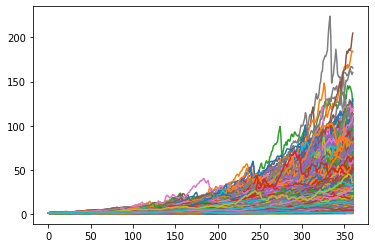

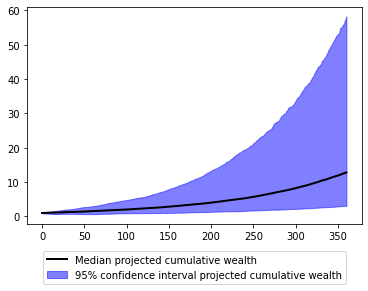

In [30]:
# Adapted from: https://stackoverflow.com/questions/66146705/creating-a-fanchart-from-a-series-of-monte-carlo-projections-in-python
import matplotlib.pyplot as plt

# This function display a nice fanchart from the cumulative wealth at every month horizon
def create_fanchart(arr):
    #
    fig, ax = plt.subplots()
    
    #
    med = np.median(arr, axis=1)
    ax.plot(med, color='black', lw=2)
    
    #
    alpha = 0.025
    low_ci = np.percentile(arr, alpha*100, axis=1)
    high_ci = np.percentile(arr, (1-alpha)*100, axis=1)
    x = np.arange(arr.shape[0])
    ax.fill_between(x, low_ci, high_ci, color='blue', alpha=0.5)

    #
    ax.legend(['Median projected cumulative wealth', '95% confidence interval projected cumulative wealth'], loc='upper center', bbox_to_anchor=(0.5, -0.1))
    
    #
    return fig, ax

# Plot the bootstrap samples of the U.S. stocks
plt.plot(cum_prices_in)

# Plot the associated fanchart for median / 95% confidence interval
fig, ax = create_fanchart(cum_prices_in)

# 
plt.show()

> Let's also plot the cumulative wealth curves associated to the statistics of interests computed at the terminal horizon only.

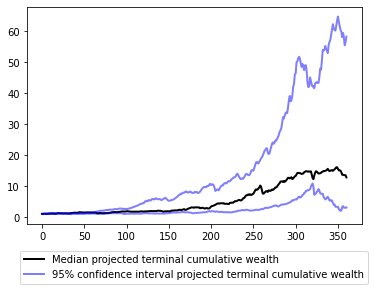

In [31]:
# Find the cumulative wealth curve corresponding to the median of the terminal wealth values
median = np.percentile(cum_prices_in[-1, :], 50, interpolation='nearest')
median_idx = np.argwhere(cum_prices_in[-1, :] == median)[0][0]

# Find the cumulative wealth curves corresponding to the percentiles of the terminal wealth values
alpha = 0.025
low_ci = np.percentile(cum_prices_in[-1, :], alpha*100, interpolation='nearest')
low_ci_idx = np.argwhere(cum_prices_in[-1, :] == low_ci)[0][0]
high_ci = np.percentile(cum_prices_in[-1, :], (1-alpha)*100, interpolation='nearest')
high_ci_idx = np.argwhere(cum_prices_in[-1, :] == high_ci)[0][0]

# Plot the wealth curves
fig, ax = plt.subplots()
ax.plot(cum_prices_in[:, median_idx], color='black', lw=2)
ax.plot(cum_prices_in[:, low_ci_idx], color='blue', alpha=0.5, lw=2)
ax.plot(cum_prices_in[:, high_ci_idx], color='blue', alpha=0.5, lw=2)
ax.legend(['Median projected terminal cumulative wealth', '95% confidence interval projected terminal cumulative wealth'], loc='upper center', bbox_to_anchor=(0.5, -0.1))

#
plt.show()    

> Let's now import the nominal total returns for U.S. stocks found in Shiller's Excel file, over the period January 1990 - December 2019...

In [32]:
# Import total return prices (out of sample)
shiller_tr_prices_out = pd.DataFrame([113528.99, 110662.41, 113660.74, 113886.76, 118275.73, 122028.02, 122237.01, 112629.28, 107741.30, 105249.02, 108391.93, 113365.63, 112589.36, 125657.55, 129483.25, 132408.63, 132172.07, 132631.01, 133667.45, 137249.58, 136834.85, 137082.62, 137103.48, 138384.80, 148568.38, 147676.90, 146183.05, 146569.41, 149600.98, 147612.60, 150435.85, 151853.24, 152428.54, 150626.35, 154778.87, 159842.20, 160071.31, 162832.36, 166334.53, 164103.15, 165292.86, 166723.36, 166825.07, 169765.30, 172065.57, 174203.09, 174216.86, 175763.11, 178815.50, 178681.51, 176138.77, 170245.88, 172048.87, 173956.70, 173055.04, 178389.69, 179848.61, 179053.06, 178393.45, 176566.03, 180894.29, 187802.81, 192606.80, 198802.56, 205460.06, 211992.19, 219515.19, 220643.88, 228848.98, 230939.69, 236388.44, 244402.29, 244803.06, 259260.63, 258743.74, 259255.46, 265362.37, 268757.17, 259418.01, 267401.43, 272817.27, 284058.67, 298412.25, 301990.61, 311829.88, 325431.10, 323403.24, 312391.70, 341188.58, 359398.35, 380015.11, 381338.69, 385886.23, 392237.45, 387720.65, 397937.55, 398882.74, 424421.57, 446971.93, 462198.15, 461176.19, 461716.73, 482347.00, 448724.88, 426746.28, 432255.90, 479693.90, 499381.62, 524591.76, 524244.72, 539573.99, 562506.00, 561950.07, 558512.24, 583772.56, 561740.96, 558383.89, 551279.20, 590453.41, 607038.25, 606317.11, 591292.93, 614596.34, 623351.57, 605655.19, 624814.26, 630123.17, 636040.35, 629169.17, 596361.89, 591753.66, 572106.05, 574705.59, 562424.81, 511353.60, 513644.65, 548976.62, 535860.12, 521605.62, 510935.01, 453469.09, 467907.69, 491551.75, 498758.14, 497273.27, 480600.73, 504367.61, 486645.72, 472924.27, 444926.39, 397056.07, 401574.78, 382466.00, 377240.83, 402238.52, 398078.42, 397194.47, 371716.94, 376580.47, 396485.37, 417546.89, 441363.92, 443999.22, 443265.96, 457283.63, 466566.53, 472224.70, 486702.76, 510729.24, 516287.03, 508214.02, 513141.52, 499990.56, 514285.98, 502779.32, 495809.97, 509613.58, 510139.97, 534497.07, 549078.76, 541680.52, 550797.35, 549399.65, 536174.00, 543345.54, 555203.23, 565247.07, 567006.38, 568599.19, 553687.56, 575631.81, 587983.80, 596615.42, 596523.40, 605395.83, 610237.47, 605445.72, 589072.21, 593322.39, 606928.54, 622299.60, 644811.65, 657728.72, 671868.74, 676531.66, 687337.48, 670341.56, 698372.58, 722068.67, 724568.12, 728742.40, 698137.92, 719614.67, 741152.92, 705540.84, 714287.04, 666900.33, 656477.89, 639242.28, 666375.99, 683458.11, 654440.04, 614661.99, 627636.55, 597213.54, 476608.45, 435588.35, 434052.18, 429281.37, 400493.19, 377699.78, 424215.86, 452444.68, 465401.43, 471324.01, 509575.39, 528152.94, 540824.10, 552129.76, 564398.38, 572049.88, 555461.95, 588466.03, 612524.10, 576494.99, 556068.51, 555188.38, 559987.48, 578869.96, 605372.81, 620457.58, 643505.20, 665794.67, 686783.05, 679152.96, 694249.99, 698839.91, 673257.40, 694152.27, 621968.16, 617071.56, 635718.62, 646970.83, 657047.93, 688485.13, 717157.60, 737852.81, 737585.19, 714801.12, 706578.03, 727236.62, 751892.09, 774626.90, 772969.66, 751061.48, 767425.92, 800198.39, 818880.11, 841186.68, 853433.26, 892489.11, 882530.62, 911269.49, 913587.85, 924499.25, 944084.97, 980535.59, 995465.03, 1005118.19, 1003830.17, 1031176.16, 1033273.96, 1049121.79, 1082672.79, 1098884.79, 1094210.26, 1113682.89, 1084223.09, 1146099.85, 1153379.63, 1140597.96, 1172868.61, 1173539.38, 1183862.44, 1195465.92, 1190274.28, 1189338.59, 1160516.45, 1108223.03, 1156080.27, 1189995.94, 1176884.62, 1101340.88, 1095292.32, 1164990.61, 1197983.81, 1194346.86, 1207093.77, 1246906.12, 1261868.92, 1256342.67, 1249996.65, 1265021.97, 1314950.16, 1333865.39, 1368242.78, 1392187.95, 1390057.65, 1413596.36, 1438721.65, 1452950.15, 1456566.26, 1480662.79, 1521168.48, 1545361.06, 1589933.91, 1667252.62, 1619142.02, 1620205.43, 1593262.15, 1624532.43, 1658874.84, 1685119.96, 1726441.58, 1755464.10, 1687920.23, 1652900.91, 1560981.87, 1588094.94, 1680683.58, 1713443.83, 1777258.41, 1750053.90, 1774657.14, 1842598.86, 1784863.70, 1839950.36, 1840148.21, 1921752.22, 1969223.97, 2035145.12])

# Compute associated returns
shiller_tr_ret_out = shiller_tr_prices_out.pct_change().dropna()

# Compute associated cumulative returns
shiller_cum_prices_out = np.cumprod(1 + np.hstack([0, shiller_tr_ret_out[0].values]))

> ... and plot them together with the bootstrap simulations, to check whether these simulations can be trusted.

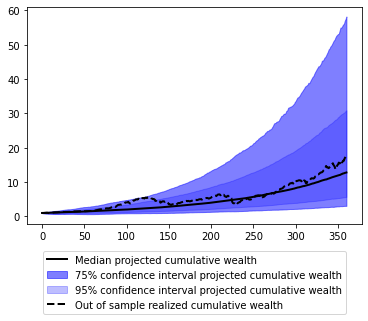

In [33]:
# This function display a nice fanchart from the cumulative wealth at every month horizon, plus the out of sample U.S. returns
def create_fanchart_out(arr, arr_out):
    #
    fig, ax = plt.subplots()
    
    #
    med = np.median(arr, axis=1)
    ax.plot(med, color='black', lw=2)
       
    # 95% CI
    alpha = 0.025
    low_ci = np.percentile(arr, alpha*100, axis=1)
    high_ci = np.percentile(arr, (1-alpha)*100, axis=1)
    x = np.arange(arr.shape[0])
    ax.fill_between(x, low_ci, high_ci, color='blue', alpha=0.5)

    # 75% CI
    alpha = 0.125
    low_ci = np.percentile(arr, alpha*100, axis=1)
    high_ci = np.percentile(arr, (1-alpha)*100, axis=1)
    x = np.arange(arr.shape[0])
    ax.fill_between(x, low_ci, high_ci, color='blue', alpha=0.25)
    
    #
    ax.plot(arr_out, color='black', lw=2, linestyle='dashed')

    #
    ax.legend(['Median projected cumulative wealth', '75% confidence interval projected cumulative wealth', '95% confidence interval projected cumulative wealth', 'Out of sample realized cumulative wealth'], loc='upper center', bbox_to_anchor=(0.5, -0.1))
    
    #
    return fig, ax

# Plot the fanchart for median / 95% confidence interval / out of sample U.S. returns
fig, ax = create_fanchart_out(cum_prices_in, shiller_cum_prices_out)

# 
plt.show()

> It seems (with 10,000 simulations) that the out of sample U.S. returns nicely always fit in the 95% confidence interval, and also most of the time fit in the 75% confidence interval! Maybe simulations can be trusted after all...